In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Adpated from https://github.com/derekbanas/seaborn/blob/master/SB%20Tut.ipynb

# Load a built in dataset based on US State car crash percentages
crash_df = sns.load_dataset('car_crashes')

# total -> Number of drivers involved in fatal collisions per billion miles (5.900–23.900)
# speeding -> Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding (1.792–9.450)
# alcohol -> Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired (1.593–10.038)
# not_distracted -> Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted (1.760–23.661)
# no_previous -> Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents (5.900–21.280)
# ins_premium -> Car Insurance Premiums (641.960–1301.520)
# ins_losses -> Losses incurred by insurance companies for collisions per insured driver (82.75–194.780)
# abbrev -> USA states

print(crash_df.head())

   total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0   18.8     7.332    5.640          18.048       15.040       784.55   
1   18.1     7.421    4.525          16.290       17.014      1053.48   
2   18.6     6.510    5.208          15.624       17.856       899.47   
3   22.4     4.032    5.824          21.056       21.280       827.34   
4   12.0     4.200    3.360          10.920       10.680       878.41   

   ins_losses abbrev  
0      145.08     AL  
1      133.93     AK  
2      110.35     AZ  
3      142.39     AR  
4      165.63     CA  


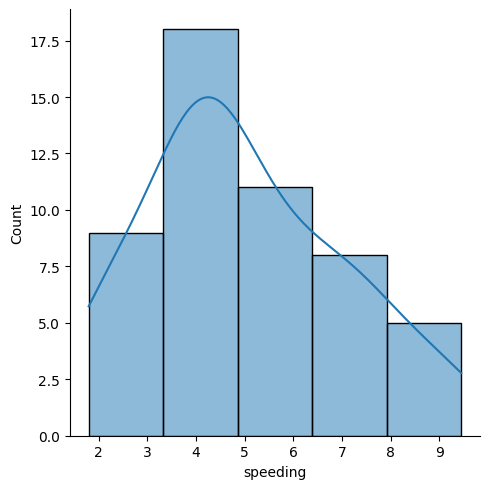

In [16]:
# INCLASS
sns_plot = sns.displot(crash_df['speeding'], kde=True, bins=5, height=5, aspect=1)
# change dpi to 300 for higher resolution
sns_plot.savefig("seaborn_histogram.png", dpi=300)


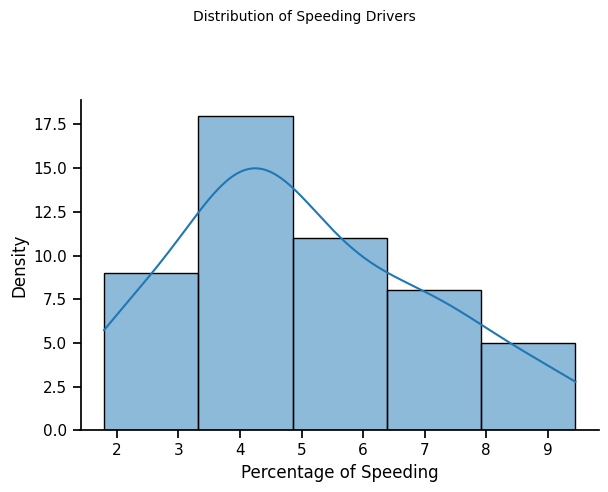

In [33]:
# Provides a way to look at a univariate distribution. A 
# univeriate distribution provides a distribution for one variable
# Kernal Density Estimation with a Histogram is provided
# kde=False removes the KDE
# Bins define how many buckets to divide the data up into between intervals

# Seaborn context settings to control font sizes globally
#sns.set_context('talk', font_scale=1)
sns.set_context('notebook')

# Create a Seaborn displot
sns_plot = sns.displot(crash_df['speeding'], kde=True, bins=5, height=5, aspect=1.25)

# Customize the plot further using Seaborn
sns_plot.set_axis_labels("Percentage of Speeding", "Density")  # Setting axis labels (Seaborn's method)

# Now, let's use Matplotlib (plt) to add additional customization

# Add a title using plt (Matplotlib's method)
plt.suptitle("Distribution of Speeding Drivers", fontsize=10)

# Adjust spacing between the title and the plot using plt
plt.subplots_adjust(top=0.80)

# Save the figure using plt
plt.savefig('plots//speeding_distribution_plot.png', dpi=300)

# Show the plot
plt.show()



[Text(0.5, 0, 'Losses per Insured Driver'), Text(0, 0.5, 'Density')]

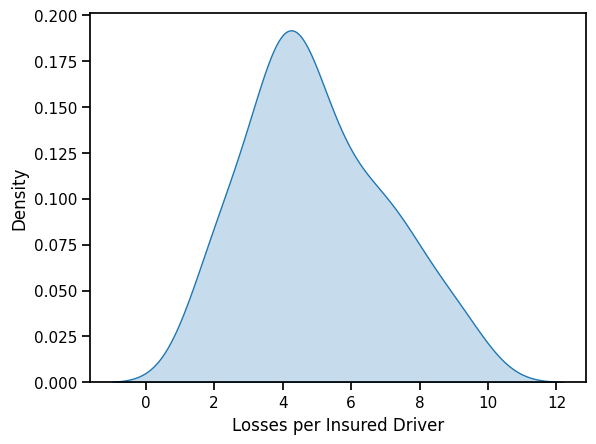

In [40]:
# Set context
sns.set_context('notebook', font_scale=1)
# Get just the KDE plot
sns_plot = sns.kdeplot(crash_df['speeding'], fill=True)
sns_plot.set(xlabel='Losses per Insured Driver', ylabel='Density')


Text(0.5, 1.02, 'Joint Plot of speeding and alcohol')

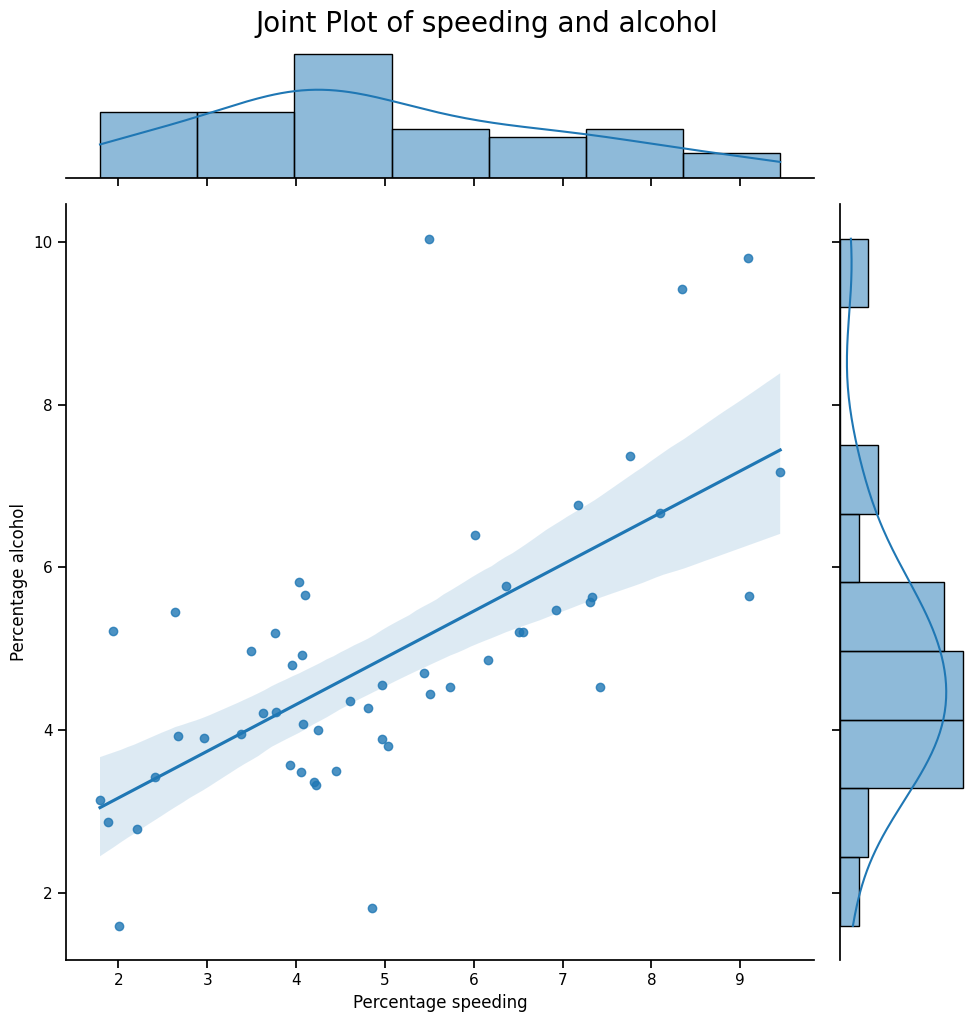

In [47]:

# Jointplot compares 2 distributions and plots a scatter plot by default
# As we can see as people tend to speed they also tend to drink & drive
# With kind you can create a regression line with kind='reg'
# You can create a 2D KDE with kind='kde'
# Kernal Density Estimation estimates the distribution of data
# You can create a hexagon distribution with kind='hex'

sns.set_context('notebook')

sns_plot = sns.jointplot(x='speeding', y='alcohol', data=crash_df, kind='reg', height=10)
sns_plot.set_axis_labels('Percentage speeding', 'Percentage alcohol')
plt.suptitle('Joint Plot of speeding and alcohol', fontsize=20, y=1.02)

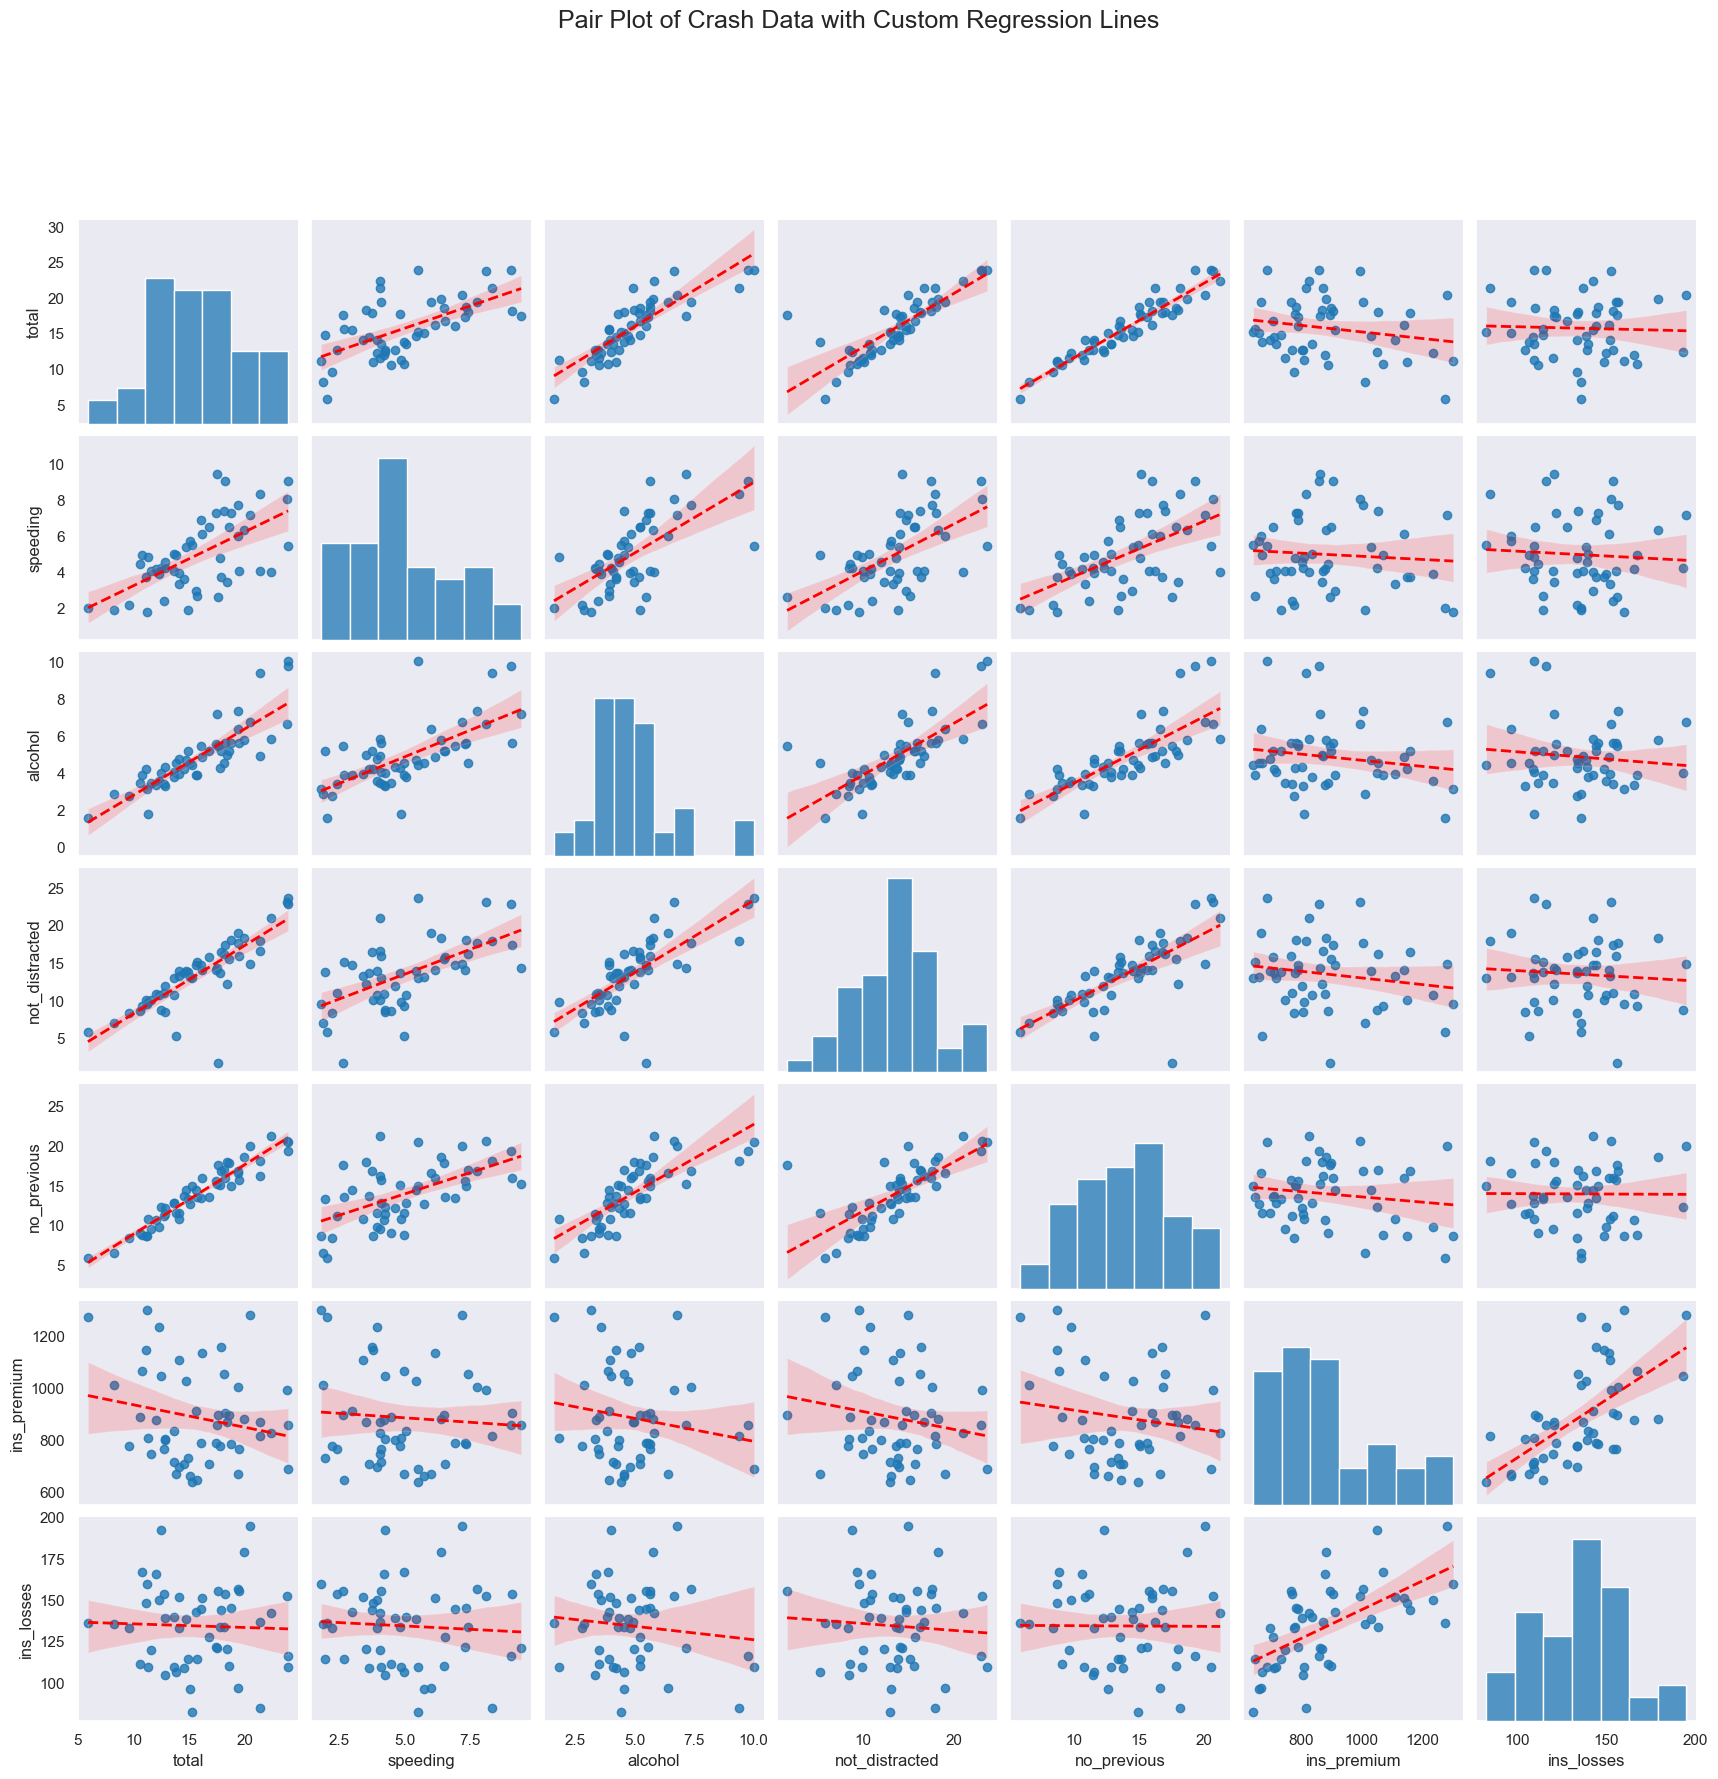

In [51]:
# Set the overall style and context
sns.set_style('dark')
sns.set_context('notebook')


# Create the pair plot and customize the regression line appearance

pair_plot = sns.pairplot(crash_df, kind="reg", 
                         plot_kws={'line_kws': {'color': 'red', 'linestyle': '--', 'linewidth': 2}},
                         diag_kind="hist")

# Add a title and adjust the layout
plt.suptitle('Pair Plot of Crash Data with Custom Regression Lines', fontsize=18, y=1.02)
pair_plot.fig.subplots_adjust(top=0.9)

# Show the plot
plt.show()

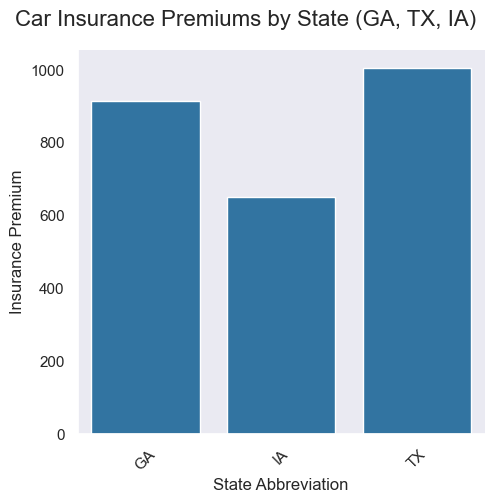

In [56]:
# Focus on distributions using categorical data in reference to one of the numerical
# columns

# Subset for only GA, TX, and IA data
crash_df_sub = crash_df[crash_df['abbrev'].isin(['GA', 'TX', 'IA'])]

# Create the bar plot without an estimator since there's only one value per state
sns_plot = sns.catplot(x='abbrev', y='ins_premium', data=crash_df_sub, kind="bar", errorbar=None)
sns_plot.set_axis_labels("State Abbreviation", "Insurance Premium")

# Add a title and rotate the x-axis labels if needed
plt.suptitle("Car Insurance Premiums by State (GA, TX, IA)", fontsize=16)
plt.xticks(rotation=45)
plt.subplots_adjust(top=0.90)


# Show the plot
plt.show()

    total  speeding  alcohol  not_distracted  no_previous  ins_premium  \
0    18.8     7.332    5.640          18.048       15.040       784.55   
1    18.1     7.421    4.525          16.290       17.014      1053.48   
2    18.6     6.510    5.208          15.624       17.856       899.47   
3    22.4     4.032    5.824          21.056       21.280       827.34   
4    12.0     4.200    3.360          10.920       10.680       878.41   
5    13.6     5.032    3.808          10.744       12.920       835.50   
6    10.8     4.968    3.888           9.396        8.856      1068.73   
7    16.2     6.156    4.860          14.094       16.038      1137.87   
8     5.9     2.006    1.593           5.900        5.900      1273.89   
9    17.9     3.759    5.191          16.468       16.826      1160.13   
10   15.6     2.964    3.900          14.820       14.508       913.15   
11   17.5     9.450    7.175          14.350       15.225       861.18   
12   15.3     5.508    4.437          

C:\Users\ctiwari\AppData\Local\Temp\2\ipykernel_3924\3989386485.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc=0)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '(0, 20]'),
  Text(1, 0, '(20, 40]'),
  Text(2, 0, '(40, 60]'),
  Text(3, 0, '(60, 80]'),
  Text(4, 0, '(80, 100]'),
  Text(5, 0, '(100, 120]'),
  Text(6, 0, '(120, 140]'),
  Text(7, 0, '(140, 160]'),
  Text(8, 0, '(160, 180]'),
  Text(9, 0, '(180, 200]')])

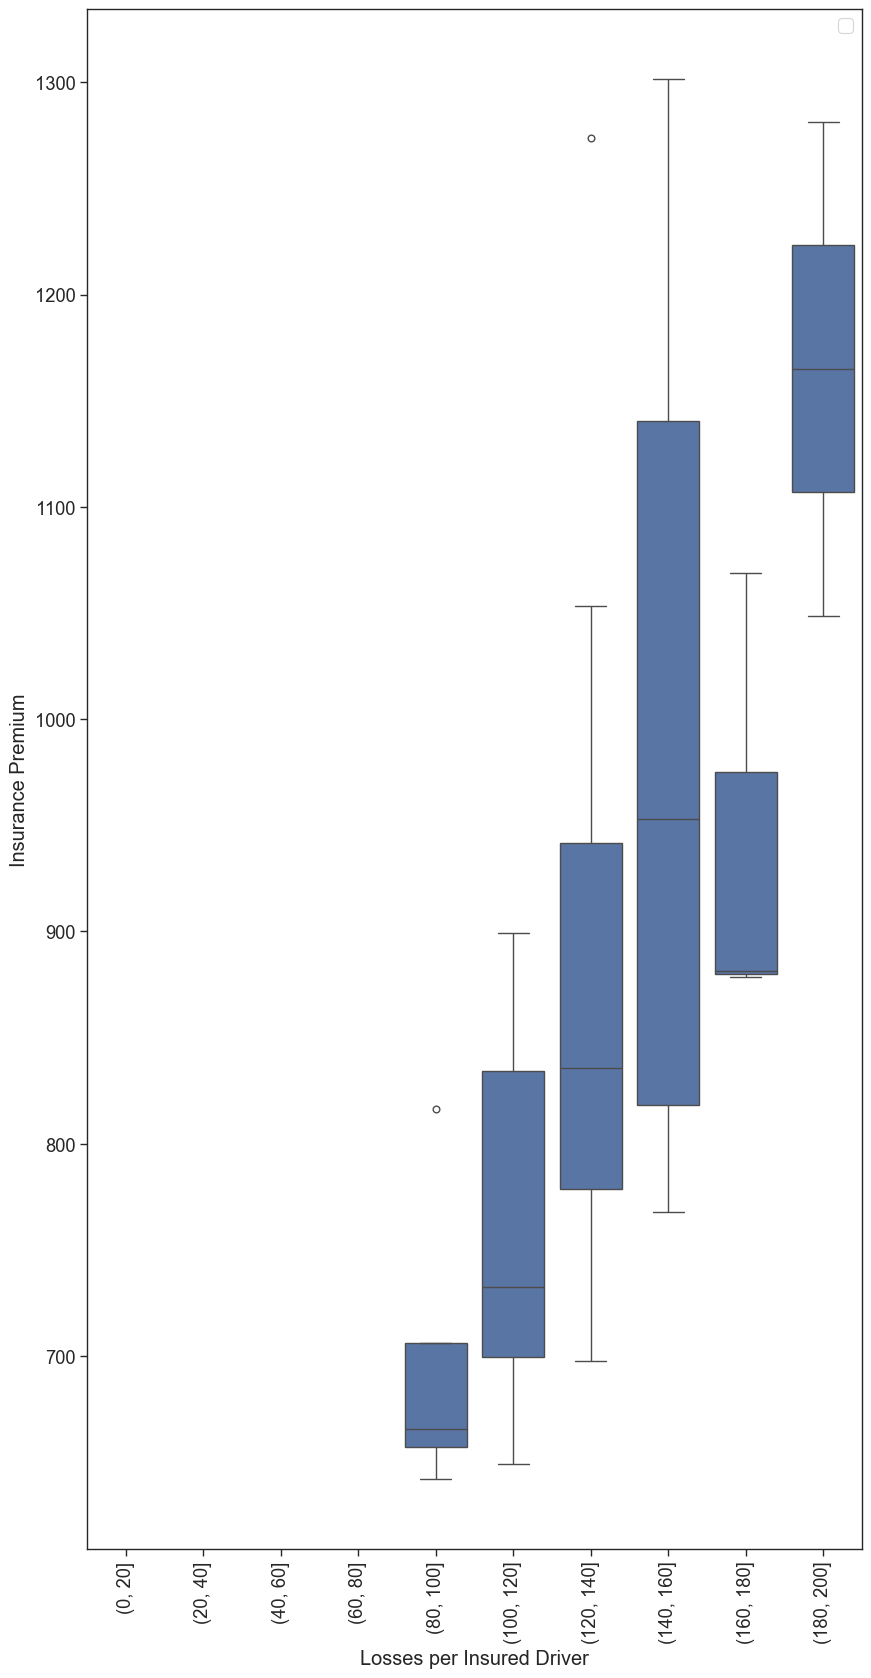

In [62]:
#print(crash_df['ins_losses'].max())
crash_df['ins_losses_int'] = pd.cut(crash_df['ins_losses'], bins=np.arange(0,210,20))
print(crash_df)

# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
sns_plot = sns.boxplot(x='ins_losses_int',y='ins_premium',data=crash_df)
sns_plot.set(xlabel='Losses per Insured Driver', ylabel='Insurance Premium')

# Moves legend to the best position
plt.legend(loc=0)
plt.xticks(rotation=90)

In [63]:
tips_df = sns.load_dataset('tips')
print(tips_df)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


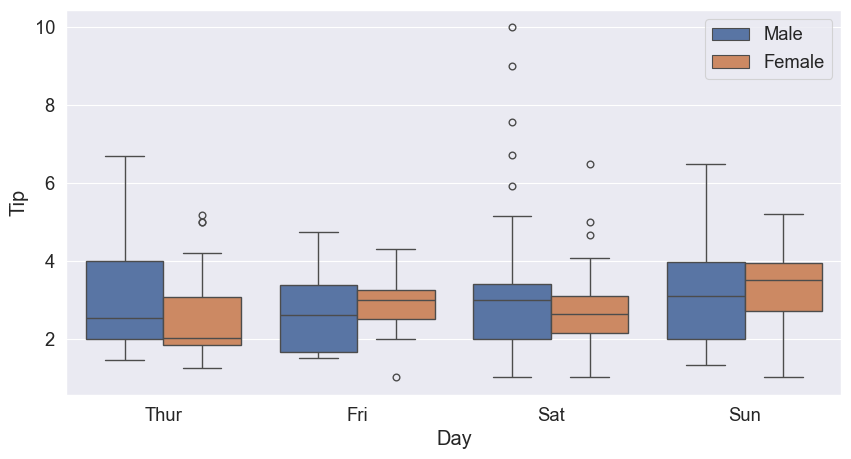

In [67]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')

# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median and
# the box extends 1 standard deviation from the median
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers
# Hue can add another category being sex
# We see men spend way more on Friday versus less than women on Saturday
sns_plot = sns.boxplot(x='day',y='tip',data=tips_df, hue='sex')
sns_plot.set(xlabel='Day', ylabel='Tip')

# Moves legend to the best position
plt.legend(loc=0)

[Text(0.5, 0, 'Day'), Text(0, 0.5, 'Total Bill')]

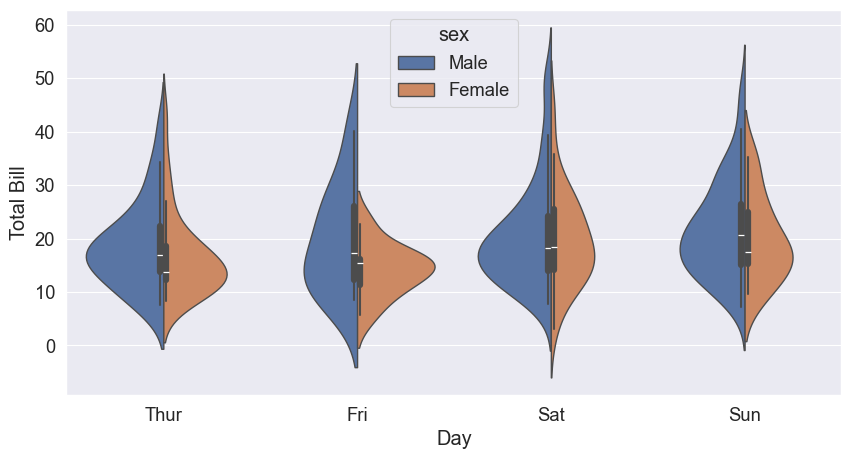

In [69]:
# Violin Plot is a combination of the boxplot and KDE
# While a box plot corresponds to data points, the violin plot uses the KDE estimation
# of the data points
# Split allows you to compare how the categories compare to each other
plt.figure(figsize=(10,5))
sns_plot = sns.violinplot(x='day',y='total_bill',data=tips_df, hue='sex',split=True)
sns_plot.set(xlabel='Day', ylabel='Total Bill')


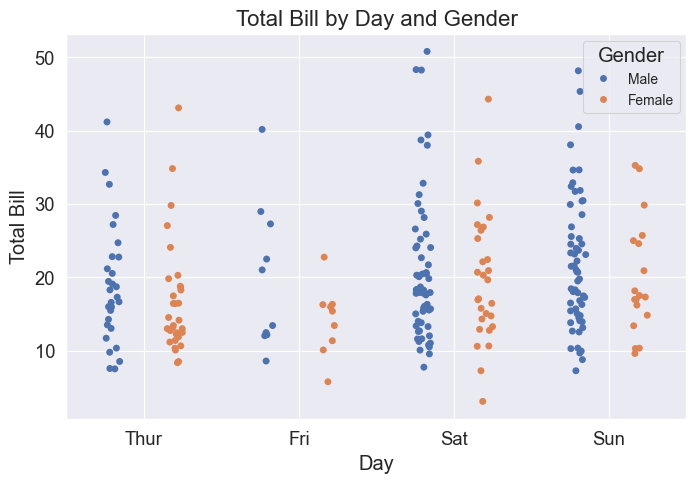

In [74]:
plt.figure(figsize=(8,5))

# The strip plot draws a scatter plot representing all data points where one
# variable is categorical. It is often used to show all observations with 
# a box plot that represents the average distribution
# Jitter spreads data points out so that they aren't stacked on top of each other
# Hue breaks data into men and women
# Dodge separates the men and women data
sns_plot = sns.stripplot(x='day',y='total_bill',data=tips_df, jitter=True, 
              hue='sex', dodge=True)

# Set axis labels and title
sns_plot.set(xlabel='Day', ylabel='Total Bill')
sns_plot.set_title('Total Bill by Day and Gender', fontsize=16)

# Adjust legend and appearance
sns_plot.legend(loc='upper right', title='Gender', fontsize=10)

# Show gridlines
sns_plot.grid(True)

# Show the plot
plt.show()


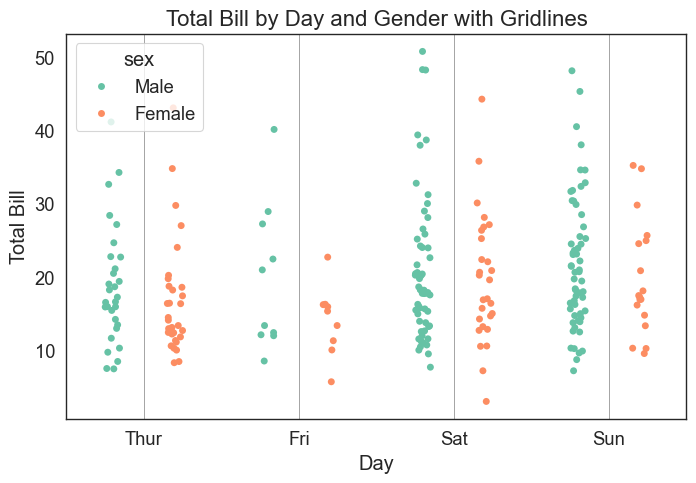

In [90]:
# Set figure size
plt.figure(figsize=(8, 5))

# Set dark style
sns.set_style('white')

# Create the strip plot with hue and dodge
sns_plot = sns.stripplot(x='day', y='total_bill', data=tips_df, jitter=True, 
                         hue='sex', dodge=True, palette="Set2")

# remove grids
plt.grid(False)

# Add vertical gridlines manually
for day in range(len(tips_df['day'].unique())):  # Loop through each day
    plt.axvline(x=day, color='gray', linestyle='-', linewidth=0.5)

# Set axis labels and title
sns_plot.set(xlabel='Day', ylabel='Total Bill')
sns_plot.set_title('Total Bill by Day and Gender with Gridlines', fontsize=16)

# Show the plot
plt.show()

C:\Users\ctiwari\AppData\Local\Temp\2\ipykernel_3924\738637703.py:12: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:white'` for the same effect.

  snsplot = sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white', hue="sex")


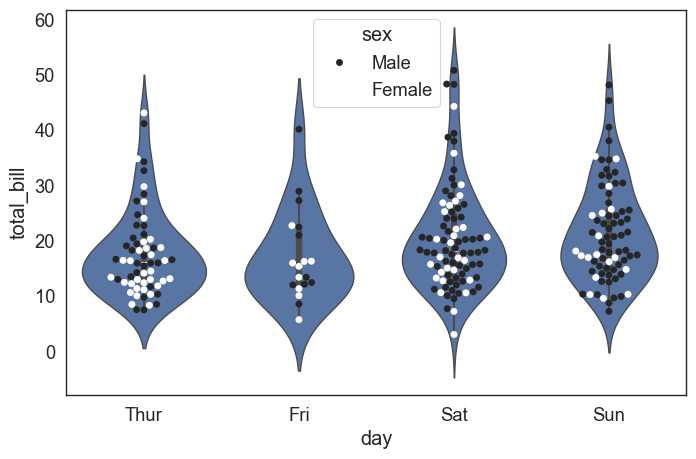

In [93]:
# A swarm plot is like a strip plot, but points are adjusted so they don't overlap
# It looks like a combination of the violin and strip plots

# Set figure size
plt.figure(figsize=(8, 5))

# Set dark style
sns.set_style('white')

# You can stack a violin plot with a swarm
snsplot = sns.violinplot(x='day',y='total_bill',data=tips_df)
snsplot = sns.swarmplot(x='day',y='total_bill',data=tips_df, color='white', hue="sex")

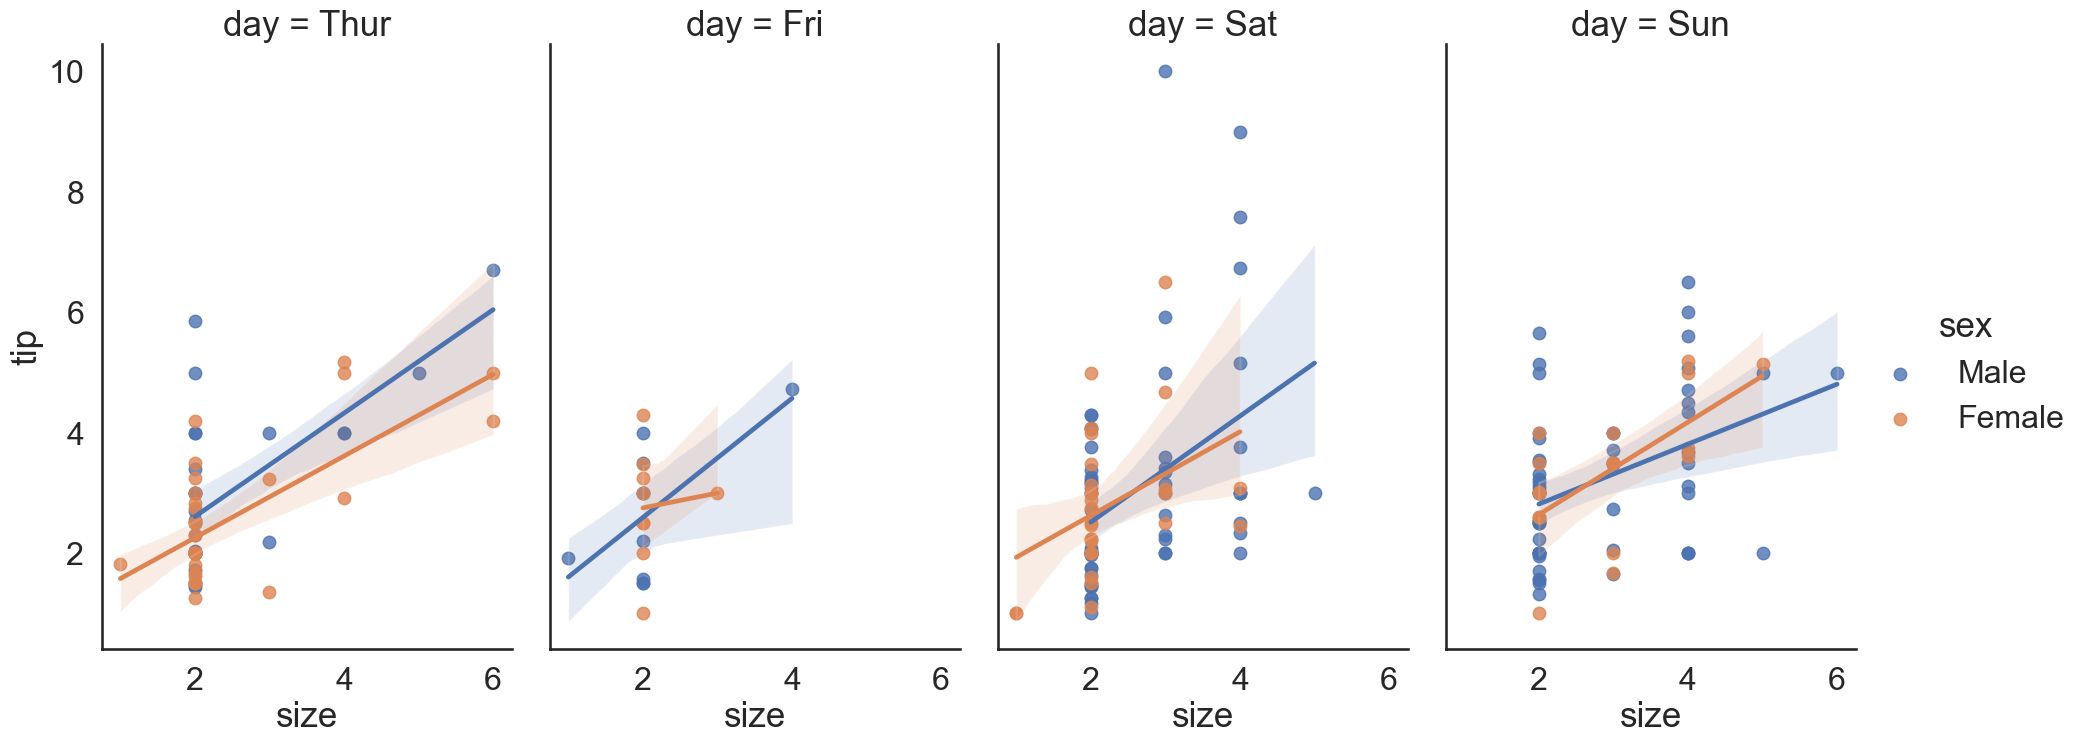

In [95]:
# You can separate the data into separate columns for day data
# sns.lmplot(x='total_bill', y='tip', col='sex', row='time', data=tips_df)
tips_df.head()

# Makes the fonts more readable
sns.set_context('talk', font_scale=1.4)

snsplot = sns.lmplot(x='size', y='tip', data=tips_df, col='day', hue='sex',
          height=8, aspect=0.6)